1. Ax=b , A는 대각 우선 행렬 (대각행렬 값이 커야함.)
2. x^(0) 값을 설정
3. 각 반복에서, i번째 방정식에 대해 새로운 값을 계산하고 Update
4. 원하는 오차범위 까지 진행. 
5. 업데이트 방식은 다음과같음

$$x_i^{k+1}=1/a_{ii}(b_i -\sum_{j=1}^{i-1}a_{ij}x_j^{k+1} - \sum_{j=i+1}^n a_{ij}x_j^{k})$$ 

In [1]:
import numpy as np

def gauss_seidel(A, b, x0, max_iterations=100, tolerance=1e-6):
    n = len(b)
    x = x0.copy()

    for iteration in range(max_iterations):
        x_old = x.copy()
        
        # 각 변수에 대해 업데이트
        for i in range(n):
            sum_ = b[i]
            for j in range(n):
                if i != j:
                    sum_ -= A[i][j] * x[j]
            x[i] = sum_ / A[i][i]
        
        # 수렴 확인
        error = np.linalg.norm(x - x_old, ord=np.inf)
        if error < tolerance:
            print(f"Converged in {iteration + 1} iterations.")
            return x
        
    print("Did not converge within the maximum number of iterations.")
    return x

# 예제: 행렬 A와 벡터 b
A = np.array([
    [4, -1, 0, 0],
    [-1, 4, -1, 0],
    [0, -1, 4, -1],
    [0, 0, -1, 3]
], dtype=float)

b = np.array([15, 10, 10, 10], dtype=float)

# 초기 추정값 x0
x0 = np.zeros(len(b))

# Gauss-Seidel 수행
solution = gauss_seidel(A, b, x0)

# 결과 출력
print("Solution:", solution)

Converged in 11 iterations.
Solution: [4.99999985 4.99999989 4.99999995 4.99999998]


Relaxation Method는 Gauss-Seidel 방법에 과잉완화 (Over-Relaxation) 또는 **저완화 (Under-Relaxation)**를 추가하여 수렴 속도를 개선하는 방식입니다. 과잉완화에서는 Gauss-Seidel 방식으로 계산된 결과를 추가로 조정하여 값이 더 빠르게 목표값에 도달하도록 합니다. 이때 완화 계수 ω를 사용하여 새로운 해를 업데이트합니다.


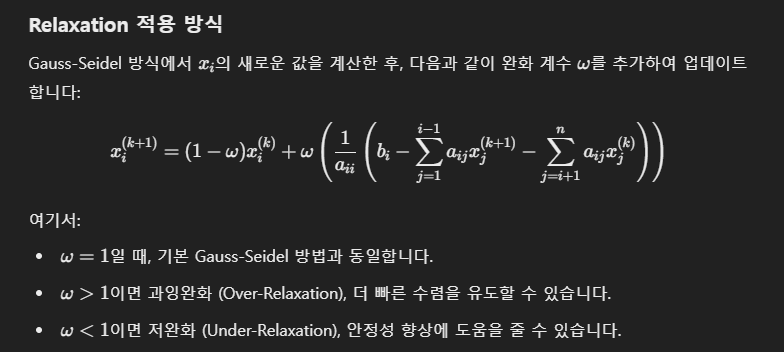

In [3]:
import numpy as np

def gauss_seidel_relaxation(A, b, x0, omega=1.0, max_iterations=100, tolerance=1e-6):
    n = len(b)
    x = x0.copy()

    for iteration in range(max_iterations):
        x_old = x.copy()
        
        # 각 변수에 대해 업데이트 (Relaxation 포함)
        for i in range(n):
            sum_ = b[i]
            for j in range(n):
                if i != j:
                    sum_ -= A[i][j] * x[j]
            
            # Gauss-Seidel 업데이트 + Relaxation
            x[i] = (1 - omega) * x_old[i] + omega * (sum_ / A[i][i])
        
        # 수렴 확인
        error = np.linalg.norm(x - x_old, ord=np.inf)
        if error < tolerance:
            print(f"Converged in {iteration + 1} iterations with omega = {omega}.")
            return x
        
    print("Did not converge within the maximum number of iterations.")
    return x

# 예제: 행렬 A와 벡터 b
A = np.array([
    [4, -1, 0, 0],
    [-1, 4, -1, 0],
    [0, -1, 4, -1],
    [0, 0, -1, 3]
], dtype=float)

b = np.array([15, 10, 10, 10], dtype=float)

# 초기 추정값 x0
x0 = np.zeros(len(b))

# Gauss-Seidel with Relaxation 수행 (예: 과잉완화 계수 omega=1.25)
solution = gauss_seidel_relaxation(A, b, x0, omega=0.8)

# 결과 출력
print("Solution:", solution)

Converged in 19 iterations with omega = 0.8.
Solution: [4.99999951 4.99999946 4.99999962 4.9999998 ]
